In [1]:
#Name: Tahmim Hassan
#Email: tahmim93.hassan@gmail.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px



In [3]:
#feature_list has the names of all variables/column names in a list

file_1= pd.read_csv('winequality-white.csv')
feature_list= list(file_1.columns)
file_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
#Checking the number of null values:

file_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
''' Sometimes null values are not always in NaN form, they can be other forms like N/a, na etc.
so for checking for them here'''

missed_values= ["N/a", "na", np.nan]
file_1= pd.read_csv('winequality-white.csv', na_values= missed_values)


In [6]:
file_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Duplicates:** There are duplicates of several entries in the file, so they have to be removed.

In [7]:
#Total number of duplicate entries found
file_1.duplicated().sum()

937

In [8]:
#Dropping the duplicated entries (all columns have to match for two entries to be considered for duplication)
file_1.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
'''The feature 'quality' is also changed to float data type to match the data types of the other features to maintain consistency'''

file_1['quality']= file_1.quality.astype(float)

In [10]:
#Used dtypes method to check the data type of all features in the dataset.

file_1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

## Removing **outlier** values and **noisy data points**:

In [11]:
#Displaying the statistical details of the dataset using 'describe' method:

file_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
file_1.shape

(4898, 12)

In [13]:
#Visualizing some outlier values:
# From the variable 'total sulfur dioxide'

'''So many datapoints are above the upper fence (upper limit) which means they are
extreme, outlier values'''

plot1= px.box(file_1, y="total sulfur dioxide")
plot1.show()

In [14]:
#Visualizing some outlier values:
# From the variable 'residual sugar'


plot1= px.box(file_1, y="residual sugar")
plot1.show()

In [15]:
#Finding and removing outliers using Inter-Quartile Range:
'''q_1= 25th percentile,  q_3= 75th percentile
  IQR= Q3- Q1'''
# file_2 is the copy of file_1. In this file, the processing of outliers will be done.

file_2= file_1.copy()


for item in feature_list:
  q_1= file_2[item].quantile(0.25)
  q_3= file_2[item].quantile(0.75)
  IQR= q_3- q_1

  lower_limit= q_1- (1.5*IQR)
  upper_limit= q_3+ (1.5*IQR)

  file_2= file_2[(file_2[item]>= lower_limit) & (file_2[item]<= upper_limit)]

# file_2 is now without any outlier values.
file_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


## **Section 2: Data Visualization**

In [16]:
#Number 1: Creating a bar chart to show distribution of a categorical variable

file_2["quality_categorical"]= pd.cut(file_2['quality'], bins= [0, 3, 6, float('Inf')],
                                      labels= ['Poor', 'Average', 'Good'])
file_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0,Average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0,Average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0,Average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,Average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,Average
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,Average
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,Average
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,Good


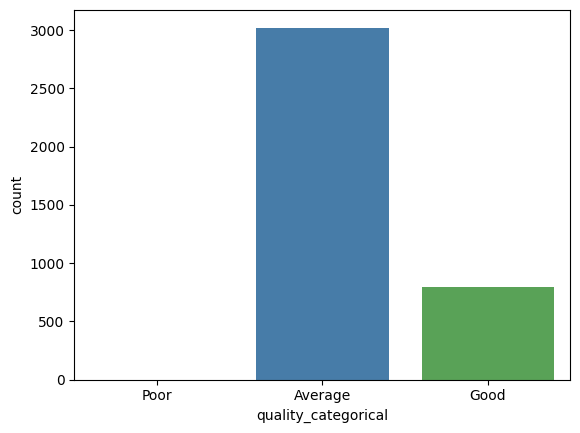

In [17]:

sns.countplot(x ='quality_categorical', data = file_2, palette= "Set1")
plt.show()

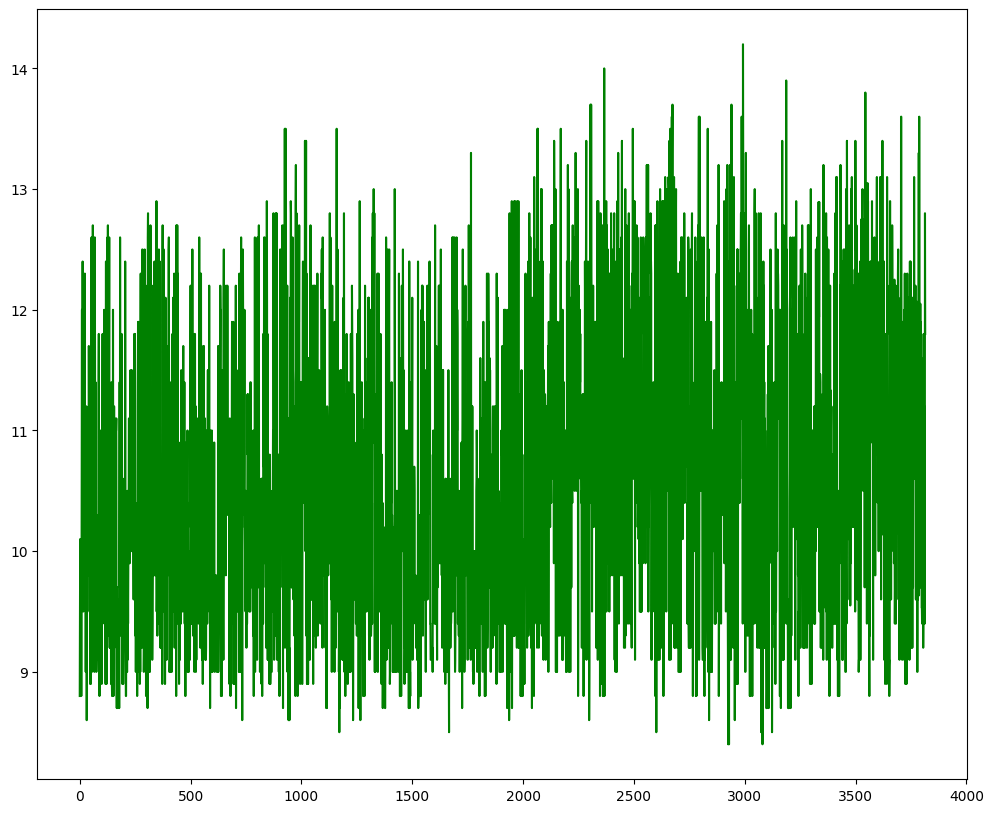

In [27]:
#Number 2: A line plot to visualize the trend of a numerical variable over time.
#The trend of variable 'alcohol' is visualized here.


y_values= np.array(file_2['alcohol'])
plt.plot(y_values, color = 'g')
plt.show()

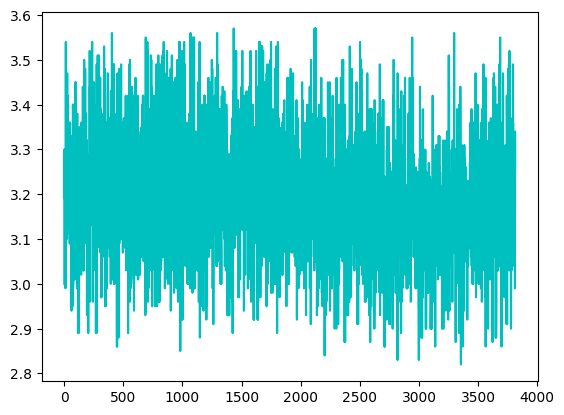

In [19]:
#The trend of variable 'pH' is visualized here.

y_values= np.array(file_2['pH'])
plt.plot(y_values, color = 'c')
plt.show()

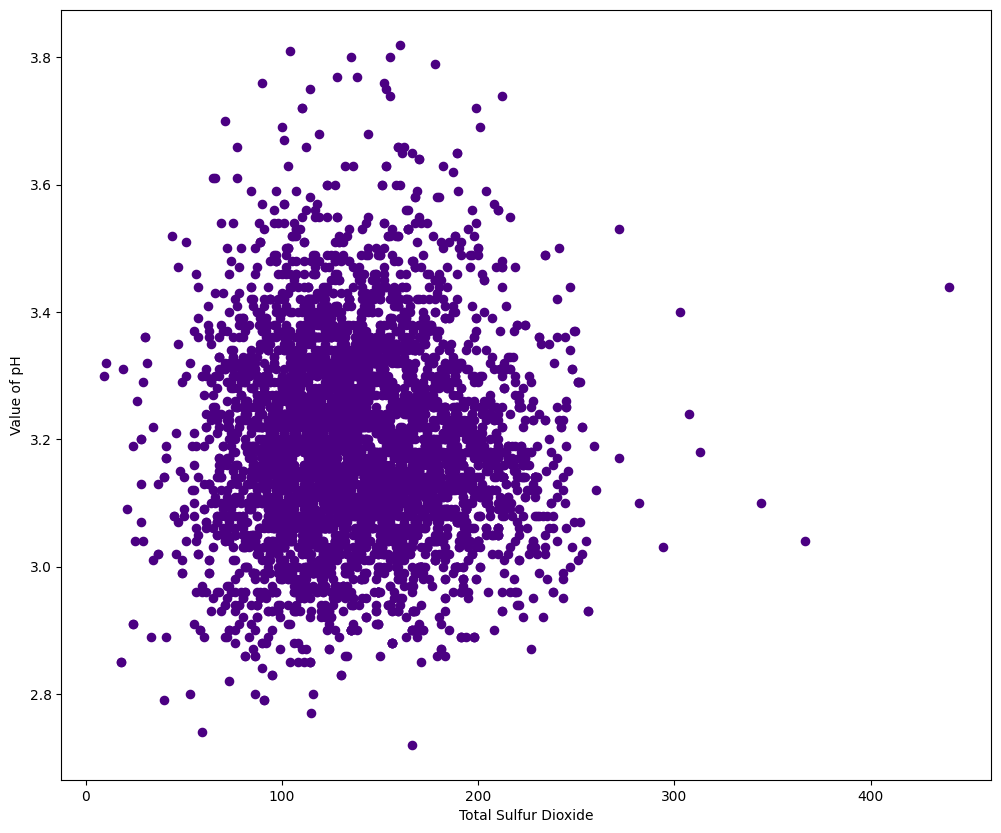

In [20]:
#Number 3: Designing a scatter plot to explore the relationship between two numerical variables.
#Relationship of Total Sulfur Dioxide amount on the value of pH is visualized here (before outliers are removed).
'''From the visualization, we can some datapoints are clearly very different from the normal positioning of the datapoints.
This is due to the presence of outliers.'''

def scatter_plot(data_frame):
  matplotlib.rcParams['figure.figsize'] = (12, 10)
  plt.scatter(data_frame['total sulfur dioxide'], data_frame['pH'],color= 'indigo', s= 35)
  plt.xlabel("Total Sulfur Dioxide")
  plt.ylabel("Value of pH")

scatter_plot(file_1)

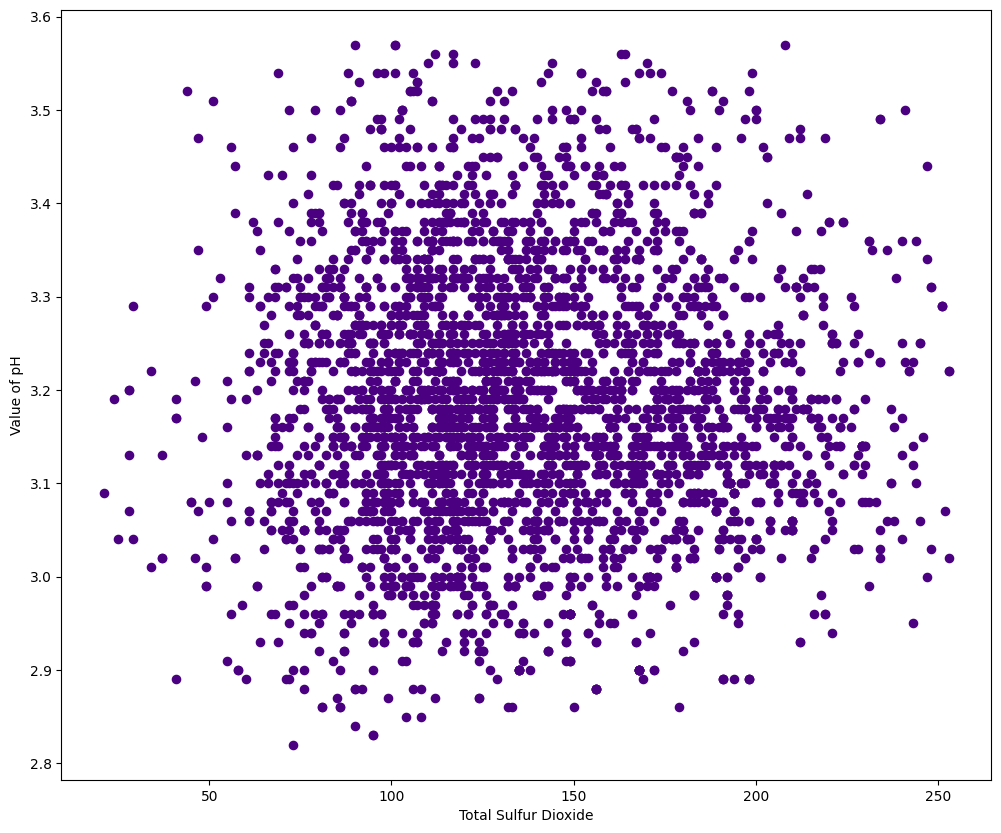

In [21]:
'''After outliers are removed,
the datapoints are more consistent now and more uniformly distributed without the presence of any extreme values'''


def scatter_plot(data_frame):
  matplotlib.rcParams['figure.figsize'] = (12, 10)
  plt.scatter(data_frame['total sulfur dioxide'], data_frame['pH'],color= 'indigo', s= 35)
  plt.xlabel("Total Sulfur Dioxide")
  plt.ylabel("Value of pH")

scatter_plot(file_2)

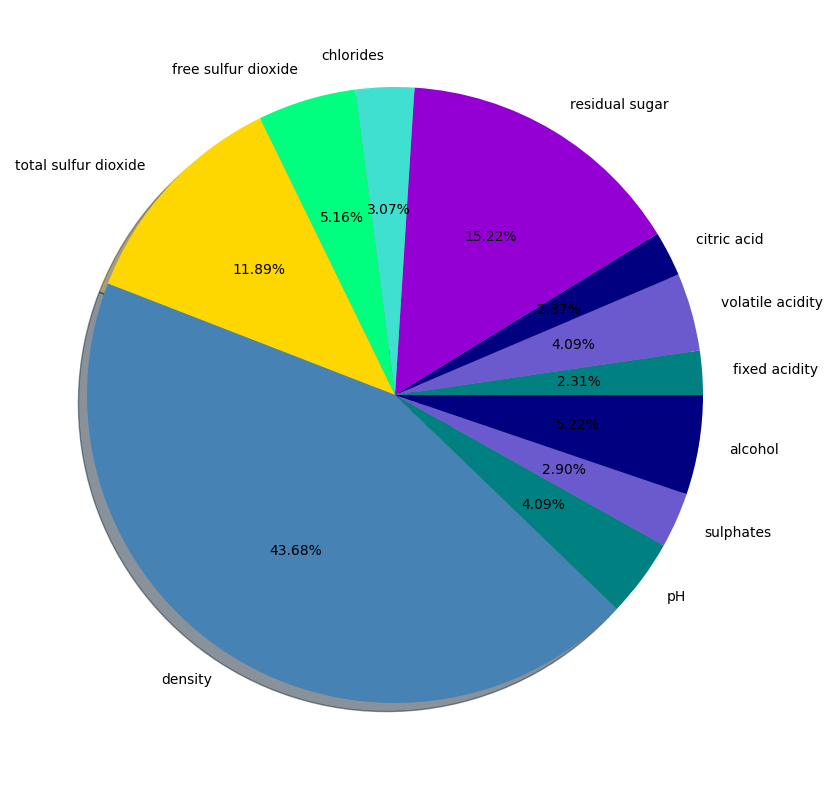

In [30]:
#Number 4: Pie Chart to represent the proportion of different categories in a dataset.
# Using the count of unique values of each category to represent its proportion.
'''Variable 'quality' is not included here as it is an qualitative variable,
and also makes a very small proportion of the total dataset'''


list1= list(file_2.columns)
count_list= []

for number in range(len(list1)-2):
  count= file_2[list1[number]].unique().size
  count_list.append(count)

plt.pie(count_list, labels= list1[:-2], autopct='%1.2f%%', colors= ["teal", "slateblue", "navy", "darkviolet", "turquoise", "springgreen",
                                                                    "gold", "steelblue"], shadow=True)
plt.show()



<ipython-input-26-6e5a712d799b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Heatmap showing correlation matrix of all the numerical variables')

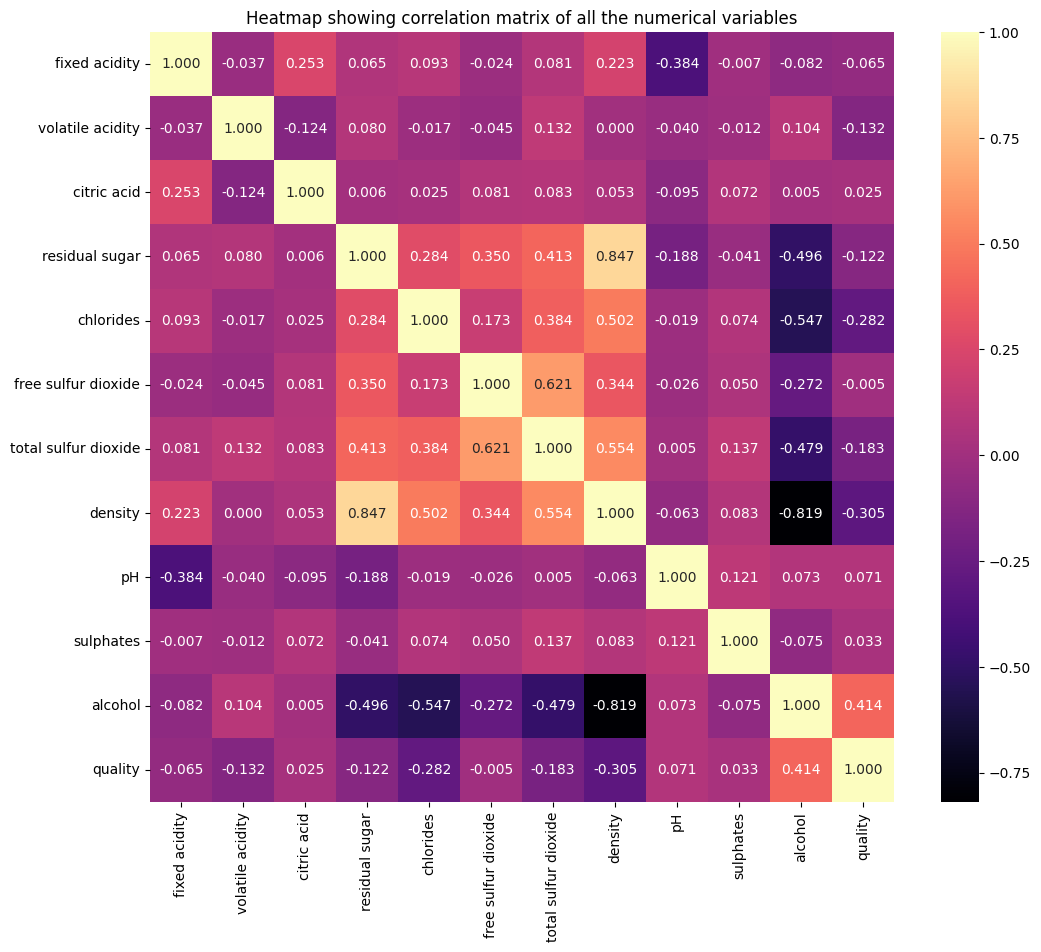

In [26]:
#Number5: Constructing a heatmap to visualize the correlation matrix of numerical variables.

data_correlation= file_2.corr()
sns.heatmap(data_correlation, annot= True, fmt='.3f', cmap = 'magma')
plt.title("Heatmap showing correlation matrix of all the numerical variables")

In [24]:
#Generating a Profile report using Pandas:

'''!pip install pandas-profiling

from pandas_profiling import ProfileReport
profile= ProfileReport(file_2)
profile.to_file(output_file ="report.html")'''

'!pip install pandas-profiling\n\nfrom pandas_profiling import ProfileReport\nprofile= ProfileReport(file_2)\nprofile.to_file(output_file ="report.html")'